# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who, What, and How: Honda Field Manager Power BI Data Story
Scenario
As a data analyst at American Honda, I develop an automated Power BI report to help field managers track daily parts sales. The report visualizes Month-to-Date (MTD) sales and target achievement (filtered to yesterday’s data), regional (Zones/Districts) performance, and annual monthly goals/results across four tabs. Using SQL CTEs directly in Power BI, I preprocess complex dealer system data to ensure complete sales and target records, enabling managers to plan promotions and resource allocation.
Who (Audience)
Field Managers (Zone/District managers) at Honda oversee parts sales targets and retention. They prefer intuitive insights over complex analytics, relying on me as a data expert. They use daily updated reports to adjust sales strategies and prioritize promotions. Following Storytelling With Data principles, I target this audience, aligning with their goals (sales achievement, regional strategy).
What (Message/Action)
Field managers should launch targeted promotions (e.g., discount coupons) in Zones/Districts with MTD achievement rates below 80% and reallocate resources to months lagging annual targets, boosting retention and sales ($500,000 projected revenue increase). The core message is: “Targeted promotions in underperforming regions and roadmap-based resource adjustments significantly improve sales and retention.” This drives actions tied to business goals.
How (Data/Supporting Evidence)
I analyze a parts sales dataset (Zone/District, daily sales, monthly targets, business days, retention rate) using SQL CTEs in Power BI to preprocess data, handling missing values and outliers (e.g., COALESCE(sales, 0)). MTD data is filtered to yesterday (e.g., 5/1–5/20/2025, sale_date <= CURRENT_DATE - 1). The report has four tabs, delivering key insights clearly, aligned with Week 2 data quality learnings.

MTD Bar Chart (Tab 1):  

Shows MTD sales vs. targets (redistributed by business days) as achievement rates (%) by region, using yesterday’s data.  
Evidence: Zone A: 75% ($45,000/$60,000); Zone B: 60% ($30,000/$50,000). Regions <80% need promotions.  
Purpose: Enables managers to assess daily effort intuitively.


Table with Conditional Formatting (Tab 2):  

Displays Zone/District MTD sales, targets, and rates. Conditional formatting: green (≥80%), yellow (60–80%), red (<60%).  
Evidence: District X: 55%, red, $25,000/$45,455—promotion priority. Clear metrics.  
Purpose: Identifies underperforming regions instantly.


12-Month Bar Chart (Tab 3):  

Compares 2025 monthly sales vs. targets (e.g., March: $180,000/$220,000, 82%).  
Evidence: Low months (e.g., March, 82%) need resources. Supports annual KPI roadmap.  
Purpose: Visualizes yearly progress for long-term planning.


12-Month Table Chart (Tab 4):  

Lists monthly sales, targets, rates with conditional formatting.  
Evidence: May projected 75%, needs strategy. Detailed analysis.  
Purpose: Supports promotion/resource planning.



Automation: SQL CTEs are directly embedded in Power BI, connecting to the database (e.g., SQL Server) for daily refresh. MTD filter limits to yesterday’s data.
SQL COALESCE and Python Implementation
SQL COALESCE: I use COALESCE(sales, 0) in CTEs to replace NULL sales with 0, ensuring complete datasets. Example:
WITH CleanData AS (
    SELECT Zone, COALESCE(sales, 0) AS sales
    FROM Sales
    WHERE sale_date <= CURRENT_DATE - 1
)
SELECT * FROM CleanData;

Python Equivalent: For OMDS’s Python focus, I replicate COALESCE using Pandas fillna():
import pandas as pd
df = pd.DataFrame({'Zone': ['A', 'B', 'C'], 'sales': [100, None, 200]})
df['sales'] = df['sales'].fillna(0)  # COALESCE(sales, 0)

This preprocesses data before Power BI import, aligning with Week 2 missing value handling.


# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [2]:
import kagglehub
print("Kagglehub version:", kagglehub.__version__)

Kagglehub version: 0.3.12


c:\ProgramData\hondaconda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from kagglehub import KaggleDatasetAdapter
import os

card_fraud_detection_train_path = kagglehub.dataset_download("tusharbhadouria/credit-card-fraud-detection")

print("Path to dataset files:", card_fraud_detection_train_path)



Path to dataset files: C:\Users\V0C61670\.cache\kagglehub\datasets\tusharbhadouria\credit-card-fraud-detection\versions\1


In [4]:
card_fraud_detection_train_path_to_file = os.path.join(card_fraud_detection_train_path, "fraudTrain.csv")

card_fraud_detection_train = pd.read_csv(card_fraud_detection_train_path_to_file)

In [5]:
card_fraud_detection_train.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
card_fraud_detection_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
card_fraud_detection_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
duplicate_rows_cfd_train = card_fraud_detection_train.duplicated()
num_duplicate_rows = duplicate_rows_cfd_train.sum()
print(f"'card_fraud_detection_train' duplicated rows: {num_duplicate_rows}")

'card_fraud_detection_train' duplicated rows: 0


In [9]:
duplicate_trans_cfd_train = card_fraud_detection_train['trans_num'].duplicated()
duplicate_trans_cfd_train

0          False
1          False
2          False
3          False
4          False
           ...  
1296670    False
1296671    False
1296672    False
1296673    False
1296674    False
Name: trans_num, Length: 1296675, dtype: bool

In [10]:
all_duplicate_trans_mask_test = card_fraud_detection_train['trans_num'].duplicated(keep=False)
df_with_all_duplicate_trans_num_train = card_fraud_detection_train[all_duplicate_trans_mask_test]
print(df_with_all_duplicate_trans_num_train.sort_values(by='trans_num'))

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]


In [11]:
# 1. 'category' unique values
unique_categories_train = card_fraud_detection_train['category'].unique()
print(f"\n'category' unique category:\n{unique_categories_train}")

# 2. 'category' count of unique values
num_unique_categories_train = card_fraud_detection_train['category'].nunique()
print(f"\n'category' count of unique category: {num_unique_categories_train}")


'category' unique category:
['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']

'category' count of unique category: 14


In [12]:
train_category_one_hot = pd.get_dummies(card_fraud_detection_train['category'], prefix='category', dtype=int)

card_fraud_detection__one_hot_train = card_fraud_detection_train.join(train_category_one_hot)

card_fraud_detection__one_hot_train.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,0,0,0,1,0,0,0,0,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,0,0,0,0,0,0,0,0,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,0,0,0,0,0,0,0,0,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,0,0,0,0,0,0,0,0,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,0,0,0,0,1,0,0,0,0


In [13]:
card_fraud_detection__one_hot_train.describe()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,...,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,...,9.535003e-02,6.623017e-02,9.494669e-02,8.717296e-02,4.880714e-02,6.143020e-02,6.999287e-02,7.522548e-02,8.997783e-02,3.123913e-02
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,...,2.936979e-01,2.486841e-01,2.931414e-01,2.820885e-01,2.154647e-01,2.401178e-01,2.551351e-01,2.637549e-01,2.861501e-01,1.739634e-01
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
card_fraud_detection__one_hot_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 37 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Unnamed: 0               1296675 non-null  int64  
 1   trans_date_trans_time    1296675 non-null  object 
 2   cc_num                   1296675 non-null  int64  
 3   merchant                 1296675 non-null  object 
 4   category                 1296675 non-null  object 
 5   amt                      1296675 non-null  float64
 6   first                    1296675 non-null  object 
 7   last                     1296675 non-null  object 
 8   gender                   1296675 non-null  object 
 9   street                   1296675 non-null  object 
 10  city                     1296675 non-null  object 
 11  state                    1296675 non-null  object 
 12  zip                      1296675 non-null  int64  
 13  lat                      1296675 non-null 

In [15]:
card_fraud_detection_test_path = kagglehub.dataset_download("tusharbhadouria/credit-card-fraud-detection")

print("Path to dataset files:", card_fraud_detection_test_path)

Path to dataset files: C:\Users\V0C61670\.cache\kagglehub\datasets\tusharbhadouria\credit-card-fraud-detection\versions\1


In [16]:
card_fraud_detection_test_path_to_file = os.path.join(card_fraud_detection_test_path, "fraudTest.csv")

card_fraud_detection_test = pd.read_csv(card_fraud_detection_test_path_to_file)

In [17]:
card_fraud_detection_test.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [18]:
card_fraud_detection_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [19]:
card_fraud_detection_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [20]:
duplicate_rows_cfd_test = card_fraud_detection_test.duplicated()
num_duplicate_rows = duplicate_rows_cfd_test.sum()
print(f"'card_fraud_detection_test' duplicated rows: {num_duplicate_rows}")

'card_fraud_detection_test' duplicated rows: 0


In [21]:
duplicate_trans_cfd_test = card_fraud_detection_test['trans_num'].duplicated()
duplicate_trans_cfd_test

0         False
1         False
2         False
3         False
4         False
          ...  
555714    False
555715    False
555716    False
555717    False
555718    False
Name: trans_num, Length: 555719, dtype: bool

In [22]:
all_duplicate_trans_mask_test = card_fraud_detection_test['trans_num'].duplicated(keep=False)
df_with_all_duplicate_trans_num_test = card_fraud_detection_test[all_duplicate_trans_mask_test]
print(df_with_all_duplicate_trans_num_test.sort_values(by='trans_num'))

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]


In [23]:
# 1. 'category' unique values
unique_categories_test = card_fraud_detection_test['category'].unique()
print(f"\n'category' unique category:\n{unique_categories_test}")

# 2. 'category' count of unique values
num_unique_categories_test = card_fraud_detection_test['category'].nunique()
print(f"\n'category' count of unique category: {num_unique_categories_test}")


'category' unique category:
['personal_care' 'health_fitness' 'misc_pos' 'travel' 'kids_pets'
 'shopping_pos' 'food_dining' 'home' 'entertainment' 'shopping_net'
 'misc_net' 'grocery_pos' 'gas_transport' 'grocery_net']

'category' count of unique category: 14


In [24]:
# prepare one-hot encoding for 'category' column.
# compare train set with test set
train_unique_categories = sorted(list(card_fraud_detection_train['category'].unique()))
test_unique_categories = sorted(list(card_fraud_detection_test['category'].unique()))

In [25]:
train_unique_categories == test_unique_categories

True

In [26]:
# One-hot encode the 'category' column for the training dataset
# Creates new columns with 'category_' prefix and integer (0/1) values
train_category_one_hot = pd.get_dummies(card_fraud_detection_train['category'], prefix='category', dtype=int)

# Join the new one-hot encoded columns to the original train DataFrame
# Store the result in 'card_fraud_detection_one_hot_train'
card_fraud_detection_one_hot_train = card_fraud_detection_train.join(train_category_one_hot)

# Display the first 5 rows of the processed train DataFrame to verify
card_fraud_detection_one_hot_train.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,0,0,0,1,0,0,0,0,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,0,0,0,0,0,0,0,0,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,0,0,0,0,0,0,0,0,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,0,0,0,0,0,0,0,0,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,0,0,0,0,1,0,0,0,0


In [27]:
card_fraud_detection_one_hot_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,...,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,...,9.535003e-02,6.623017e-02,9.494669e-02,8.717296e-02,4.880714e-02,6.143020e-02,6.999287e-02,7.522548e-02,8.997783e-02,3.123913e-02
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,...,2.936979e-01,2.486841e-01,2.931414e-01,2.820885e-01,2.154647e-01,2.401178e-01,2.551351e-01,2.637549e-01,2.861501e-01,1.739634e-01
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [28]:
# One-hot encode the 'category' column for the test dataset
# Creates new columns with 'category_' prefix and integer (0/1) values
test_category_one_hot = pd.get_dummies(card_fraud_detection_test['category'], prefix='category', dtype=int)

# Join the new one-hot encoded columns to the original test DataFrame
# Store the result in 'card_fraud_detection_one_hot_test'
card_fraud_detection_one_hot_test = card_fraud_detection_test.join(test_category_one_hot)

# Display the first 5 rows of the processed test DataFrame to verify
card_fraud_detection_one_hot_test.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,0,0,0,0,0,0,1,0,0,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,0,0,0,0,0,0,1,0,0,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,0,1,0,0,0,0,0,0,0,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,0,0,0,0,0,1,0,0,0,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,0,0,0,0,0,0,0,0,0,1


In [29]:
card_fraud_detection_one_hot_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               555719 non-null  int64  
 1   trans_date_trans_time    555719 non-null  object 
 2   cc_num                   555719 non-null  int64  
 3   merchant                 555719 non-null  object 
 4   category                 555719 non-null  object 
 5   amt                      555719 non-null  float64
 6   first                    555719 non-null  object 
 7   last                     555719 non-null  object 
 8   gender                   555719 non-null  object 
 9   street                   555719 non-null  object 
 10  city                     555719 non-null  object 
 11  state                    555719 non-null  object 
 12  zip                      555719 non-null  int64  
 13  lat                      555719 non-null  float64
 14  long

In [30]:
# Prepare train and test datasets for model training and evaluation
cfd_train = card_fraud_detection_one_hot_train.copy()
cfd_train_y = card_fraud_detection_one_hot_train['is_fraud'] #split y with is_fraud
cfd_train_X = cfd_train.drop(columns=['is_fraud']) #drop the is_fraud column
cfd_train_X = cfd_train_X.drop(columns=['Unnamed: 0']) #drop the unnamed column becase it is index column
cfd_test = card_fraud_detection_one_hot_test.copy()
cfd_test_y = cfd_test['is_fraud'] #split y with is_fraud
cfd_test_X = cfd_test.drop(columns=['is_fraud']) #drop the is_fraud column
cfd_test_X = cfd_test_X.drop(columns=['Unnamed: 0']) #drop the unnamed column becase it is index column



In [31]:
# dbo is object dtype, so we need to convert it to datetime
cfd_train['dob'] = pd.to_datetime(cfd_train['dob'])
cfd_test['dob'] = pd.to_datetime(cfd_test['dob'])

In [32]:
# trans_date_trans_time 
cfd_train['trans_date_trans_time'] = pd.to_datetime(cfd_train['trans_date_trans_time'])
cfd_test['trans_date_trans_time'] = pd.to_datetime(cfd_test['trans_date_trans_time'])

# unix_time to datetime
cfd_train['datetime_from_unix'] = pd.to_datetime(cfd_train['unix_time'], unit='s')
cfd_test['datetime_from_unix'] = pd.to_datetime(cfd_test['unix_time'], unit='s')

# compare the two columns
print("Training data time comparison:")
print(cfd_train[['trans_date_trans_time', 'datetime_from_unix']].head(5))
print("\nTesting data time comparison:")
print(cfd_test[['trans_date_trans_time', 'datetime_from_unix']].head(5))


Training data time comparison:
  trans_date_trans_time  datetime_from_unix
0   2019-01-01 00:00:18 2012-01-01 00:00:18
1   2019-01-01 00:00:44 2012-01-01 00:00:44
2   2019-01-01 00:00:51 2012-01-01 00:00:51
3   2019-01-01 00:01:16 2012-01-01 00:01:16
4   2019-01-01 00:03:06 2012-01-01 00:03:06

Testing data time comparison:
  trans_date_trans_time  datetime_from_unix
0   2020-06-21 12:14:25 2013-06-21 12:14:25
1   2020-06-21 12:14:33 2013-06-21 12:14:33
2   2020-06-21 12:14:53 2013-06-21 12:14:53
3   2020-06-21 12:15:15 2013-06-21 12:15:15
4   2020-06-21 12:15:17 2013-06-21 12:15:17


Transaction date year is different with Unixtime's year. After meeting with LF, I decide to drop unix_time, datetime_from_unix and Unnamed: 0(index).

In [33]:
#drop the Unnamed: 0, unix_time and datetime_from_unix columns as they are not needed for dataset
cfd_train.drop(['Unnamed: 0', 'unix_time', 'datetime_from_unix'], axis=1, inplace=True)
cfd_test.drop(['Unnamed: 0', 'unix_time', 'datetime_from_unix'], axis=1, inplace=True)

In [34]:
# Convert 'dob' to datetime
cfd_train['dob'] = pd.to_datetime(cfd_train['dob'])
cfd_test['dob'] = pd.to_datetime(cfd_test['dob'])

In [35]:
cfd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   trans_date_trans_time    1296675 non-null  datetime64[ns]
 1   cc_num                   1296675 non-null  int64         
 2   merchant                 1296675 non-null  object        
 3   category                 1296675 non-null  object        
 4   amt                      1296675 non-null  float64       
 5   first                    1296675 non-null  object        
 6   last                     1296675 non-null  object        
 7   gender                   1296675 non-null  object        
 8   street                   1296675 non-null  object        
 9   city                     1296675 non-null  object        
 10  state                    1296675 non-null  object        
 11  zip                      1296675 non-null  int64         
 12  

In [36]:
cfd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_date_trans_time    555719 non-null  datetime64[ns]
 1   cc_num                   555719 non-null  int64         
 2   merchant                 555719 non-null  object        
 3   category                 555719 non-null  object        
 4   amt                      555719 non-null  float64       
 5   first                    555719 non-null  object        
 6   last                     555719 non-null  object        
 7   gender                   555719 non-null  object        
 8   street                   555719 non-null  object        
 9   city                     555719 non-null  object        
 10  state                    555719 non-null  object        
 11  zip                      555719 non-null  int64         
 12  lat             

In [37]:
# Credit Card Approval Dataset
credit_approval_path = kagglehub.dataset_download("caesarmario/application-data")

print("Path to dataset files:", credit_approval_path)

Path to dataset files: C:\Users\V0C61670\.cache\kagglehub\datasets\caesarmario\application-data\versions\4


In [38]:
credit_approval_path_to_file = os.path.join(credit_approval_path, "Application_Data.csv")

credit_approval = pd.read_csv(credit_approval_path_to_file)

In [39]:
credit_approval.head(5)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [40]:
credit_approval.describe()

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
count,2.512800e+04,25128.000000,25128.000000,25128.000000,2.512800e+04,25128.0,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,5.078835e+06,0.418378,0.654927,0.509472,1.948365e+05,1.0,0.273758,0.292741,0.100684,2.291309,40.995503,7.690903,0.333095,21.057545,0.995185
std,4.194378e+04,0.493303,0.475402,0.762937,1.045211e+05,0.0,0.445895,0.455030,0.300916,0.928871,9.552832,6.415007,1.569448,14.735347,0.069227
min,5.008806e+06,0.000000,0.000000,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,1.000000,0.000000,1.000000,0.000000
25%,5.042226e+06,0.000000,0.000000,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,33.000000,3.000000,0.000000,9.000000,1.000000
50%,5.079004e+06,0.000000,1.000000,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,40.000000,6.000000,0.000000,18.000000,1.000000
75%,5.115603e+06,1.000000,1.000000,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,48.000000,10.000000,0.000000,31.000000,1.000000
max,5.150487e+06,1.000000,1.000000,5.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,7.000000,68.000000,44.000000,49.000000,61.000000,1.000000


In [41]:
credit_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [42]:
duplicate_rows_credit_approval = credit_approval.duplicated()
num_duplicate_rows = duplicate_rows_credit_approval.sum()
print(f"'credit_approval' duplicated rows: {num_duplicate_rows}")

'credit_approval' duplicated rows: 0


In [43]:
duplicate_application = credit_approval['Applicant_ID'].duplicated()
duplicate_application

0        False
1        False
2        False
3        False
4        False
         ...  
25123    False
25124    False
25125    False
25126    False
25127    False
Name: Applicant_ID, Length: 25128, dtype: bool

In [44]:
all_duplicate_applicaion = credit_approval['Applicant_ID'].duplicated(keep=False)
all_duplicate_applicaion = credit_approval[all_duplicate_applicaion]
print(all_duplicate_applicaion.sort_values(by='Applicant_ID'))

Empty DataFrame
Columns: [Applicant_ID, Applicant_Gender, Owned_Car, Owned_Realty, Total_Children, Total_Income, Income_Type, Education_Type, Family_Status, Housing_Type, Owned_Mobile_Phone, Owned_Work_Phone, Owned_Phone, Owned_Email, Job_Title, Total_Family_Members, Applicant_Age, Years_of_Working, Total_Bad_Debt, Total_Good_Debt, Status]
Index: []

[0 rows x 21 columns]


In [45]:
credit_approval['Status'].value_counts()

Status
1    25007
0      121
Name: count, dtype: int64

In [46]:
credit_approval['Applicant_Gender'].value_counts()

Applicant_Gender
F          15627
M           9501
Name: count, dtype: int64

In [47]:
credit_approval['Job_Title'].nunique()

18

In [48]:
credit_approval['Income_Type'].value_counts()

Income_Type
Working                                               15616
Commercial associate                                   7052
State servant                                          2437
Pensioner                                                13
Student                                                  10
Name: count, dtype: int64

In [49]:
#one-hot encoding for categorical columns
credit_approval_one_hot_gender = pd.get_dummies(credit_approval['Applicant_Gender'], prefix='Applicant_Gender', dtype=int)
credit_approval_one_hot_job_title = pd.get_dummies(credit_approval['Job_Title'], prefix='Job_Title', dtype=int)
credit_approval_one_hot_income_type = pd.get_dummies(credit_approval['Income_Type'], prefix='Income_Type', dtype=int)

In [50]:
credit_approval_one_hot = credit_approval.join([credit_approval_one_hot_gender,credit_approval_one_hot_job_title,credit_approval_one_hot_income_type])
credit_approval_one_hot.head(5)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Job_Title_Realty agents,Job_Title_Sales staff,Job_Title_Secretaries,Job_Title_Security staff,Job_Title_Waiters/barmen staff,Income_Type_Commercial associate,Income_Type_Pensioner,Income_Type_State servant,Income_Type_Student,Income_Type_Working
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,1,0,0,0,0,0,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,0,0,0,1,0,0,0,0
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,0,0,0,1,0,0,0,0
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,0,0,0,1,0,0,0,0
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,0,0,0,1,0,0,0,0


In [51]:
credit_approval_one_hot.describe()

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,...,Job_Title_Realty agents,Job_Title_Sales staff,Job_Title_Secretaries,Job_Title_Security staff,Job_Title_Waiters/barmen staff,Income_Type_Commercial associate,Income_Type_Pensioner,Income_Type_State servant,Income_Type_Student,Income_Type_Working
count,2.512800e+04,25128.000000,25128.000000,25128.000000,2.512800e+04,25128.0,25128.000000,25128.000000,25128.000000,25128.000000,...,25128.000000,25128.00000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,5.078835e+06,0.418378,0.654927,0.509472,1.948365e+05,1.0,0.273758,0.292741,0.100684,2.291309,...,0.003144,0.13869,0.006009,0.023559,0.006885,0.280643,0.000517,0.096983,0.000398,0.621458
std,4.194378e+04,0.493303,0.475402,0.762937,1.045211e+05,0.0,0.445895,0.455030,0.300916,0.928871,...,0.055983,0.34563,0.077288,0.151675,0.082690,0.449322,0.022740,0.295941,0.019945,0.485033
min,5.008806e+06,0.000000,0.000000,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.042226e+06,0.000000,0.000000,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.079004e+06,0.000000,1.000000,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.115603e+06,1.000000,1.000000,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.150487e+06,1.000000,1.000000,5.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,7.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
credit_approval_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 46 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Applicant_ID                                                    25128 non-null  int64 
 1   Applicant_Gender                                                25128 non-null  object
 2   Owned_Car                                                       25128 non-null  int64 
 3   Owned_Realty                                                    25128 non-null  int64 
 4   Total_Children                                                  25128 non-null  int64 
 5   Total_Income                                                    25128 non-null  int64 
 6   Income_Type                                                     25128 non-null  object
 7   Education_Type                                            

In [53]:
# Loan approval dataset preparation
loan_default_path = kagglehub.dataset_download("marcbuji/loan-default-prediction")
print("Path to dataset files (Loan Default Prediction):", loan_default_path)

Path to dataset files (Loan Default Prediction): C:\Users\V0C61670\.cache\kagglehub\datasets\marcbuji\loan-default-prediction\versions\1


In [54]:
loan_default_csv_path = os.path.join(loan_default_path, "Data_Train.csv")
loan_default = pd.read_csv(loan_default_csv_path)

In [55]:
loan_default.head(5)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [56]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly_Income        81925 non-null  float64
 6   Home_Status          87500 non-null  object 
 7   Unpaid_2_years       87500 non-null  int64  
 8   Already_Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt_to_Income       84011 non-null  float64
 11  Postal_Code          86111 non-null  float64
 12  Lend_Amount          87500 non-null  float64
 13  Deprecatory_Records  87500 non-null  int64  
 14  Interest_Charged     87500 non-null  float64
 15  Usage_Rate           87500 non-null 

In [57]:
loan_default.describe()

,ID,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Sub_GGGrade,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee,Default
count,87500.000000,8.750000e+04,8.192500e+04,87500.000000,87500.000000,84011.000000,86111.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.00000,8.331400e+04,8.264800e+04,87500.000000,87500.000000
mean,83946.253509,3.798914e+06,1.348596e+05,0.332937,0.005726,30.942660,51155.385491,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,22.024891,12.77944,5.326864e+04,2.955649e+04,0.316407,0.188709
std,36100.102950,2.289038e+06,9.882473e+04,0.876080,0.083505,14.079813,31211.229930,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,6.452697,5.37116,5.325551e+04,3.745625e+04,3.546087,0.391279
min,21560.000000,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.00000,3.320000e+02,0.000000e+00,0.000000,0.000000
25%,52616.750000,1.483874e+06,8.324659e+04,0.000000,0.000000,20.428800,22900.000000,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,17.000000,9.00000,2.324000e+04,1.144674e+04,0.000000,0.000000
50%,83900.000000,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,47700.000000,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,21.000000,12.00000,3.967400e+04,2.089278e+04,0.000000,0.000000
75%,115261.250000,5.952909e+06,1.601600e+05,0.000000,0.000000,40.908000,80200.000000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,26.000000,16.00000,6.640000e+04,3.644908e+04,0.000000,0.000000
max,146559.000000,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,99900.000000,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,45.000000,83.00000,1.710630e+06,1.338778e+06,169.050000,1.000000


In [58]:
#check for Validation column for one-hot encoding
loan_default['Validation'].value_counts()

Validation
Source Verified    34504
Vfied              26642
Not Vfied          26354
Name: count, dtype: int64

In [59]:
# Group by 'Default' and count total and missing 'Yearly_Income' for each group
income_missing_summary = loan_default.groupby('Default')['Yearly_Income'].agg(total_count='size',  # Total number of records in each 'Default' group
missing_count=lambda x: x.isnull().sum() # Number of NaNs in 'Yearly_Income' for each group
).reset_index()

# Calculate the percentage of missing income for each group
income_missing_summary['missing_percentage'] = (income_missing_summary['missing_count'] / income_missing_summary['total_count']) * 100

print("\nSummary of missing 'Yearly_Income' by 'Default' status:")
print(income_missing_summary)



Summary of missing 'Yearly_Income' by 'Default' status:
   Default  total_count  missing_count  missing_percentage
0        0        70988           4547            6.405308
1        1        16512           1028            6.225775


In [60]:
#
loan_default_processed = loan_default.copy()
categories_to_map = {'Source Verified': 'Verified','Vfied': 'Verified', 'Not Vfied': 'Not_Vfied'} # Keep 'Not Vfied' as is, or adjust name for consistency

loan_default_processed['Validation_Cleaned'] = loan_default_processed['Validation'].map(categories_to_map)
print(loan_default_processed['Validation_Cleaned'].value_counts())

Validation_Cleaned
Verified     61146
Not_Vfied    26354
Name: count, dtype: int64


### After meeting with LF, I decide that null values were removed from the dataset. This approach was taken due to the sufficient remaining data to support robust analysis.

In [61]:
loan_default_processed = loan_default_processed.dropna()

In [62]:
loan_default_processed.isnull().sum()

ID                     0
Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly_Income          0
Home_Status            0
Unpaid_2_years         0
Already_Defaulted      0
Designation            0
Debt_to_Income         0
Postal_Code            0
Lend_Amount            0
Deprecatory_Records    0
Interest_Charged       0
Usage_Rate             0
Inquiries              0
Present_Balance        0
Gross_Collection       0
Sub_GGGrade            0
File_Status            0
State                  0
Account_Open           0
Total_Unpaid_CL        0
Duration               0
Unpaid_Amount          0
Reason                 0
Claim_Type             0
Due_Fee                0
Default                0
Validation_Cleaned     0
dtype: int64

In [63]:
loan_default_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68505 entries, 0 to 87498
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   68505 non-null  int64  
 1   Asst_Reg             68505 non-null  int64  
 2   GGGrade              68505 non-null  object 
 3   Experience           68505 non-null  object 
 4   Validation           68505 non-null  object 
 5   Yearly_Income        68505 non-null  float64
 6   Home_Status          68505 non-null  object 
 7   Unpaid_2_years       68505 non-null  int64  
 8   Already_Defaulted    68505 non-null  int64  
 9   Designation          68505 non-null  object 
 10  Debt_to_Income       68505 non-null  float64
 11  Postal_Code          68505 non-null  float64
 12  Lend_Amount          68505 non-null  float64
 13  Deprecatory_Records  68505 non-null  int64  
 14  Interest_Charged     68505 non-null  float64
 15  Usage_Rate           68505 non-null  floa

In [64]:
# Check the 'Home_Status' column for unique values
loan_default_processed['Home_Status'].value_counts()

Home_Status
MORTGAGE    34636
RENT        27289
OWN          6572
OTHER           6
NONE            2
Name: count, dtype: int64

In [65]:
hone_status_one_hot = pd.get_dummies(loan_default_processed['Home_Status'], prefix='Home_Status', dtype=int)
loan_default_processed = loan_default_processed.join(hone_status_one_hot) 

In [66]:
loan_default_processed

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,Reason,Claim_Type,Due_Fee,Default,Validation_Cleaned,Home_Status_MORTGAGE,Home_Status_NONE,Home_Status_OTHER,Home_Status_OWN,Home_Status_RENT
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,debt consolidation,I,0.0,0,Verified,1,0,0,0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,debt consolidation,I,0.0,0,Verified,0,0,0,0,1
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,major purchase,I,0.0,0,Verified,0,0,0,0,1
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,major purchase,I,0.0,1,Verified,0,0,0,0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,debt consolidation,I,0.0,0,Verified,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87494,23253,5409793,III,<1yr,Source Verified,246400.00,RENT,0,0,Technical Architecture Manager,...,small business,I,0.0,0,Verified,0,0,0,0,1
87495,120884,4535984,II,>10yrs,Not Vfied,75680.00,RENT,0,0,Engineer Support II,...,debt consolidation,I,0.0,0,Not_Vfied,0,0,0,0,1
87496,33259,2624710,IV,3yrs,Source Verified,90423.52,RENT,0,0,Dental Hygienist,...,debt consolidation,I,0.0,0,Verified,0,0,0,0,1
87497,102153,5966919,II,>10yrs,Source Verified,91520.00,MORTGAGE,0,0,Interface Coordinator,...,debt consolidation,I,0.0,0,Verified,1,0,0,0,0


In [67]:
# Check Designation
loan_default_processed['Designation'].value_counts()

Designation
School Teacher                    1271
Super Lead                        1037
Nurse                              586
Owner                              495
RN                                 487
                                  ... 
Business field tech                  1
FIeld Merchandising Specialist       1
Account Relationship Associate       1
BUILDING OPERATIONS MANAGER          1
PARTS CLERK                          1
Name: count, Length: 33208, dtype: int64

In [68]:
loan_default_processed['Total_Unpaid_CL'].value_counts().sort_index()

Total_Unpaid_CL
332.00         1
498.00         7
664.00         3
830.00        18
996.00         3
              ..
1283180.00     1
1316765.12     1
1518734.00     1
1682742.00     1
1710630.00     1
Name: count, Length: 3911, dtype: int64

In [69]:
# Check GGGrade column for unique values
loan_default_processed['GGGrade'].value_counts()

GGGrade
II     19532
III    19323
I      11110
IV     10831
V       5576
VI      1741
VII      392
Name: count, dtype: int64

In [70]:
GGGrade_one_hot = pd.get_dummies(loan_default_processed['GGGrade'], prefix='GGGrade', dtype=int)
loan_default_processed = loan_default_processed.join(GGGrade_one_hot)
loan_default_processed.head(5)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,Home_Status_OTHER,Home_Status_OWN,Home_Status_RENT,GGGrade_I,GGGrade_II,GGGrade_III,GGGrade_IV,GGGrade_V,GGGrade_VI,GGGrade_VII
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,0,0,0,0,1,0,0,0,0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,0,0,1,0,0,0,1,0,0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,0,0,1,0,0,1,0,0,0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,0,0,1,0,0,1,0,0,0,0
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,0,0,1,0,0,0,0,1,0,0


In [71]:
loan_default_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68505 entries, 0 to 87498
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    68505 non-null  int64  
 1   Asst_Reg              68505 non-null  int64  
 2   GGGrade               68505 non-null  object 
 3   Experience            68505 non-null  object 
 4   Validation            68505 non-null  object 
 5   Yearly_Income         68505 non-null  float64
 6   Home_Status           68505 non-null  object 
 7   Unpaid_2_years        68505 non-null  int64  
 8   Already_Defaulted     68505 non-null  int64  
 9   Designation           68505 non-null  object 
 10  Debt_to_Income        68505 non-null  float64
 11  Postal_Code           68505 non-null  float64
 12  Lend_Amount           68505 non-null  float64
 13  Deprecatory_Records   68505 non-null  int64  
 14  Interest_Charged      68505 non-null  float64
 15  Usage_Rate            68

EDA and Preprocessing Summary
1. Credit Card Fraud Detection
Datasets: card_fraud_detection_train, card_fraud_detection_test

Initial Setup:
Loaded data, reviewed with .head(), .info(), .describe().


Cleaning:
Dropped Unnamed: 0 column.
Separated and dropped is_fraud target variable.


Date/Time:
Identified trans_date_trans_time, dob, unix_time for datetime conversion.
Noted year mismatch between trans_date_trans_time and unix_time. 


After consult with LF, decide to drop unix_time in the furture ML.


Duplicates:
trans_num in test set: No duplicates (checked with keep=False).
Full row duplicates in train set: To be confirmed.


Encoding:
category: 14 unique values, identical in train/test. One-hot encoded, original column dropped.
Other categoricals (merchant, gender, etc.): Identified for future encoding.



2. Credit Card Approval Prediction
Dataset: credit_approval_df

Initial Setup:
Loaded data, reviewed with .info(). No initial nulls.


Duplicates:
No full row duplicates.
Applicant_ID: All unique.


Target:
Status: Investigated as target (distribution to be confirmed).


Encoding:
One-hot encoded: Applicant_Gender, Job_Title (18 unique), Income_Type (5 unique).
Original categorical columns to be dropped.


Binary Features:
Noted pre-existing binary numerical columns (e.g., Owned_Car).



3. Loan Default Prediction
Dataset: loan_default

Initial Setup:
Loaded data, reviewed with .info() and data dictionary.


Missing Values & Flags:
Yearly_Income: NaNs exist. Created Income_Available flag. Missingness similar across Default classes. Imputed NaNs with 0.
Total_Unpaid_CL: NaNs exist. No explicit '0's in value_counts(). Imputed NaNs with 0.
Unpaid_Amount: NaNs exist. Imputed NaNs with 0. Considered _Available flag.
Debt_to_Income: NaNs exist. Imputed NaNs with 0.
Designation: NaNs exist, high cardinality (40k+). Created Designation_Available flag. Original column likely to be dropped.
Postal_Code: NaNs exist. Created Postal_Code_Available flag. Original column needs strategy.


Feature Creation:
Unpaid_CL_to_Income_Ratio: Planned, code provided.


Encoding/Transformation:
Validation: Explored ("Source Verified", "Vfied", "Not Vfied"). Discussed consolidation and one-hot encoding.
Home_Status: 5 unique values. One-hot encoded.
GGGrade: 7 unique values. One-hot encoded.
To Do: Parse Experience & Duration; encode File_Status, State, Reason, Claim_Type.


Target:
Default: Identified as target.





In [74]:
import os

out_path = r'F:\BU\CDSDX 699 O2\Homework\data'

# 파일 경로 정의
cfd_train_path = os.path.join(out_path, 'cfd_train_processed.csv')
cfd_test_path = os.path.join(out_path, 'cfd_test_processed.csv')
credit_approval_path = os.path.join(out_path, 'credit_approval_processed.csv')
loan_default_path = os.path.join(out_path, 'loan_default_processed.csv')

# DataFrame 저장
cfd_train.to_csv(cfd_train_path, index=False)
cfd_test.to_csv(cfd_test_path, index=False)
credit_approval.to_csv(credit_approval_path, index=False)
loan_default.to_csv(loan_default_path, index=False)

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

## Analysis of the "Our Customers vs. US Population" Stacked Bar Chart

This stacked bar chart aims to compare the composition of "Our Customers" against the "US Population" across seven distinct segments. The primary goal of such a comparison is typically to identify how the customer base differs from the general population, potentially revealing over-represented or under-represented groups, and highlighting market penetration opportunities or biases.

However, the chart's effectiveness is severely undermined by its use of generic labels: "Segment 1" through "Segment 7". Without clear, descriptive names for these segments, it's impossible for the audience to understand what specific attributes or categories are being compared. Viewers are left to speculate whether these segments represent demographic information (such as age groups, income brackets, or ethnicity, as one might reasonably guess), behavioral patterns, or other forms of market segmentation.

This lack of clarity means the chart fails to convey a specific message or actionable insight. While the technique of using a stacked bar chart for this type of comparison is valid, the absence of meaningful segment labels renders this particular visualization uninformative and ineffective. For this chart to tell a compelling story and support data-driven decisions, each segment would need a clear and understandable label defining the characteristic it represents.

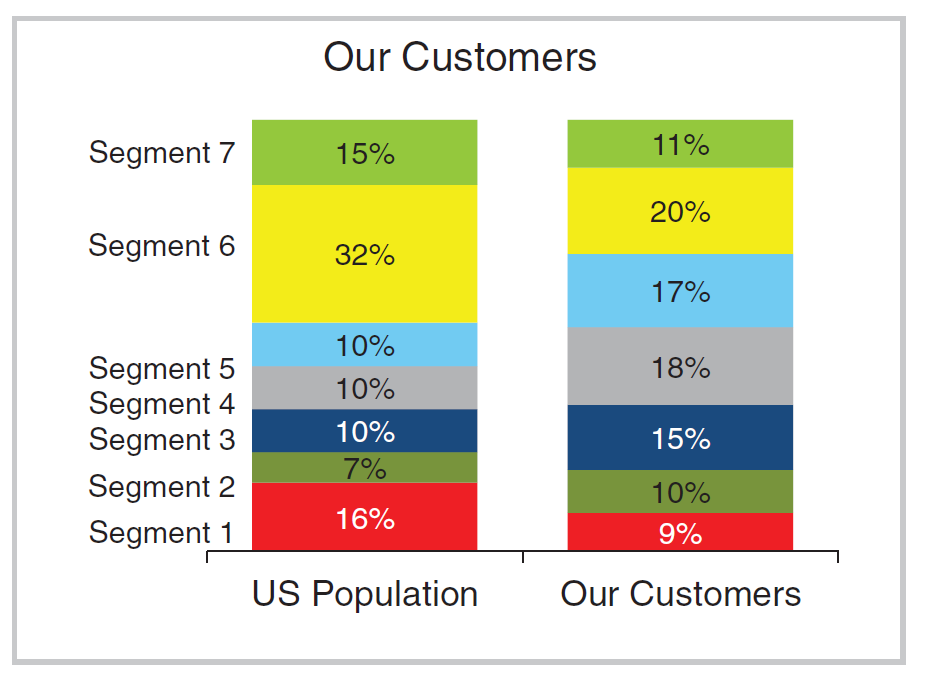

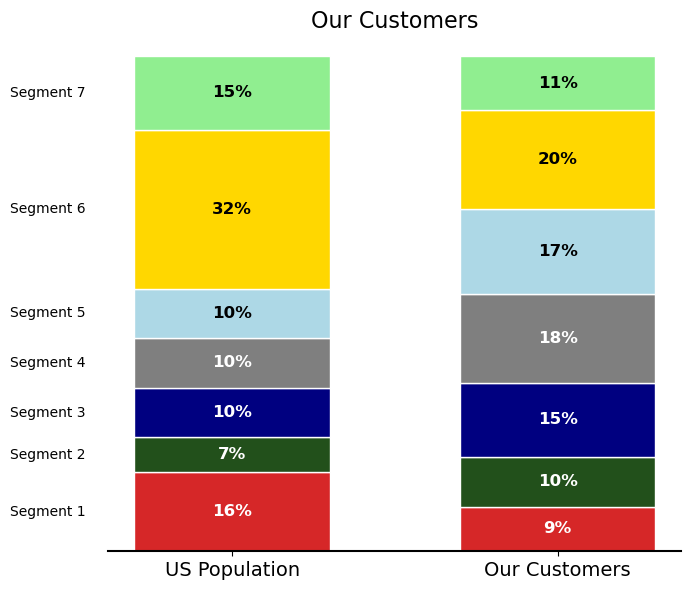

In [73]:
import matplotlib.pyplot as plt

labels = ['US Population', 'Our Customers']
segment_data_us = np.array([16, 7, 10, 10, 10, 32, 15])
segment_data_customers = np.array([9, 10, 15, 18, 17, 20, 11])

segment_names = [
    'Segment 1', 'Segment 2', 'Segment 3', 'Segment 4',
    'Segment 5', 'Segment 6', 'Segment 7'
]

colors = ['#d62728', '#22501b', '#000080', '#7f7f7f', '#add8e6', '#ffd700', '#90ee90']

fig, ax = plt.subplots(figsize=(7, 6))

bar_width = 0.6
x_positions = np.arange(len(labels))

bottom_us = 0
for i, percentage in enumerate(segment_data_us):
    ax.bar(x_positions[0], percentage, bar_width, bottom=bottom_us, color=colors[i], edgecolor='white')
    text_color = 'white' if colors[i] not in ['#ffd700', '#90ee90', '#add8e6'] else 'black'
    if percentage > 3:
        ax.text(x_positions[0], bottom_us + percentage / 2, f'{percentage}%',
                ha='center', va='center', color=text_color, fontsize=12, fontweight='bold')
    bottom_us += percentage

bottom_customers = 0
for i, percentage in enumerate(segment_data_customers):
    ax.bar(x_positions[1], percentage, bar_width, bottom=bottom_customers, color=colors[i], edgecolor='white')
    text_color = 'white' if colors[i] not in ['#ffd700', '#90ee90', '#add8e6'] else 'black'
    if percentage > 3:
        ax.text(x_positions[1], bottom_customers + percentage / 2, f'{percentage}%',
                ha='center', va='center', color=text_color, fontsize=12, fontweight='bold')
    bottom_customers += percentage

current_height_for_side_labels = 0
for i, percentage in enumerate(segment_data_us): # 3. US Population 데이터 사용
    segment_label_y_position = current_height_for_side_labels + percentage / 2
    ax.text(x_positions[0] - 0.45,
            segment_label_y_position,
            segment_names[i],
            ha='right',
            va='center',
            fontsize=10)
    current_height_for_side_labels += percentage

ax.set_title('Our Customers', fontsize=16, pad=20)
ax.set_xticks(x_positions)
ax.set_xticklabels(labels, fontsize=14)

ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.spines['bottom'].set_linewidth(1.5)

ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()